In [ ]:
!pip install qiskit


  Using cached https://files.pythonhosted.org/packages/9b/d3/a244f4a599776546f15249544073ae2ab1ac4b7b3d661b51ad26acb479a4/qiskit-0.23.0.tar.gz
     |████████████████████████████████| 8.5MB 3.2MB/s 
     |████████████████████████████████| 17.5MB 246kB/s 
     |████████████████████████████████| 194kB 46.3MB/s 
     |████████████████████████████████| 204kB 48.5MB/s 
     |████████████████████████████████| 2.1MB 43.6MB/s 
     |████████████████████████████████| 5.8MB 8.4MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 1.1MB 32.6MB/s 
     |████████████████████████████████| 194kB 46.5MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 583kB 20.8MB/s 
     |████████████████████████████████| 102kB 11.4MB/s 
     |████████████████████████████████| 2.6MB 24.7MB/s 
     |████████████████████████████████| 5.5MB 16.1MB/s 
  Created wheel for qiskit: filename=qiskit-0.23.0-cp36-none-any.whl size=2865 

<h1>Quantum Phase Estimation Algorithm</h1>

Suppose we had:

$|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $

The probability of measuring each outcome, 1 or 0, would be 1/2, each.

Lets say that we apply a unitary gate, $U$ to the state $|\psi\rangle$. This is the same as multiplying it my by the eigenvalue $U$, in the form $e^{2 \pi i\theta }$, so:

$U|\psi \rangle = e^{2 \pi i\theta }|\psi \rangle $

Now if we were told to measure:

$|\psi\rangle =  e^{2 \pi i\theta }\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $


The probability of measuring 1 or 0 would still be 1/2, each.

The question that we are presented with is: can we somehow extract the value of $\theta$, given the fact that we are allowed to prepare $U$ and $|\psi\rangle$?

Given that: $|\psi\rangle$ is an eigen vector, with corresponding eigen value,  $e^{2 \pi i\theta }$ , we can extract this, with the help of the Quantam Phase Estiamtion (QPE) Algorithm.


<h2>Phase Kickback</h2>

The way that we encode information about the phase that the gate would apply to the qubit is through Phase Kickback. 

We know that when we apply a global pase to a qubit, there is no visible affect of the outcome probabilities for the qubit. 

Suppose we had: 

If a controlled-U gate is applied to some |$\psi\rangle$, the eigenstate of $U$, |$\psi\rangle$ remains unchaged and 

<h3>How it works</h3>

Let's say we have some system of qubits in a circuit:

$|\psi_0\rangle = |0\rangle^{\otimes n }|\psi\rangle$

Where $|0\rangle$ is our counting qubit(s), and $|\psi\rangle$ is the qubit(s) used to encode information about the phase of the unitary, $U$, which is controlled.

First we apply a hadamrd gate to our counting qubits, turning $|0\rangle$ into a superposition:

$|\psi_1\rangle =H^{\otimes n}|0\rangle^{\otimes n }|\psi\rangle$

$ =\frac{1}{2^{\frac{n}{2}}}(|0\rangle + |1\rangle)^{\otimes n }|\psi\rangle$

Now, we apply the controlled operator $U$. A phase will applied to $|\psi \rangle$, since it is an eigen vector, if the value on the control is 1. Instead of applying $U$ once for every counting bit, we can get more precision by appling double the previous amount, starting at 1.

After 1 iteration, the phase on $|\psi \rangle$ is:

$ =\frac{1}{2^{\frac{n}{2}}}(|0\rangle + |1\rangle)^{\otimes n-1 }\otimes (|0\rangle + |1\rangle) \otimes U|\psi\rangle$

Using the fact that $|\psi\rangle$ is an eigenvector of $U$, we can use the relation:

$=...(|0\rangle + |1\rangle) \otimes U|\psi\rangle$

$=...(|0\rangle + |1\rangle) \otimes e^{2 \pi i\theta} |\psi\rangle$

$=...(|0\rangle + e^{2 \pi i\theta}|1\rangle) \otimes |\psi\rangle$

After $n-1$ iterations, we get:

$\psi_{something} = \frac{1}{2^{\frac{n}{2}}} (|0\rangle + e^{2 \pi i\theta}|1\rangle)\otimes  (|0\rangle + e^{2 \pi i\theta \times 2}|1\rangle) \otimes  (|0\rangle + e^{2 \pi i\theta \times 4}|1\rangle) ... \otimes  (|0\rangle + e^{2 \pi i\theta \times 2^{n-1}}|1\rangle) \otimes |\psi\rangle $


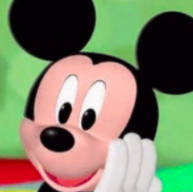




Lets make a circuit:

In [ ]:
import qiskit
from qiskit import *
from qiskit.visualization import plot_histogram
from math import pi as pi
import numpy as np
import math
%matplotlib inline

print('ok')

ok


In [ ]:
n_q = 10 #change this to whatever
qpe = QuantumCircuit(n_q, n_q -1)
qpe.x(n_q - 1)
qpe.draw()  

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
          
q_7: ─────
          
q_8: ─────
     ┌───┐
q_9: ┤ X ├
     └───┘
c: 9/═════

Apply Hadamard gates to every qubit we will be using to measure our phase. Lets call this our counting register. In this case, we will be using 9 qubits to measure, and one qubit to encode the phase (the bottom most one), $|q_9\rangle$. You can use any number of qubit(s) to encode your phase or as bits used for measurement, as long as the encoded qubit was initially an eigen vector. 

The unitary gate that will be applied will be the T-gate:

$$T = \begin{bmatrix} 1 & 0 \\0 & e^\frac{i\pi}{4} \end{bmatrix}$$


In [ ]:
for qubit in range(n_q - 1):
    qpe.h(qubit)
qpe.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     ├───┤
q_4: ┤ H ├
     ├───┤
q_5: ┤ H ├
     ├───┤
q_6: ┤ H ├
     ├───┤
q_7: ┤ H ├
     ├───┤
q_8: ┤ H ├
     ├───┤
q_9: ┤ X ├
     └───┘
c: 9/═════

In [ ]:

reps = 1
for counting_qubit in range(n_q - 1):
    for i in range(reps):
        qpe.cu1(math.pi/4, counting_qubit, n_q - 1)
    reps = reps*2
qpe.draw()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  """


┌───┐                                                                  »
q_0: ┤ H ├─■────────────────────────────────────────────────────────────────»
     ├───┤ │                                                                »
q_1: ┤ H ├─┼─────■─────■────────────────────────────────────────────────────»
     ├───┤ │     │     │                                                    »
q_2: ┤ H ├─┼─────┼─────┼─────■─────■─────■─────■────────────────────────────»
     ├───┤ │     │     │     │     │     │     │                            »
q_3: ┤ H ├─┼─────┼─────┼─────┼─────┼─────┼─────┼─────■─────■─────■─────■────»
     ├───┤ │     │     │     │     │     │     │     │     │     │     │    »
q_4: ┤ H ├─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
     ├───┤ │     │     │     │     │     │     │     │     │     │     │    »
q_5: ┤ H ├─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
     ├───┤ │     │     │     │     │     │     │     │     │     │     │    »
q_6: ┤ H ├─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
     ├───┤ │     │     │     │     │     │     │     │     │     │     │    »
q_7: ┤ H ├─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
     ├───┤ │     │     │     │     │     │     │     │     │     │     │    »
q_8: ┤ H ├─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
     ├───┤ │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4 »
q_9: ┤ X ├─■─────■─────■─────■─────■─────■─────■─────■─────■─────■─────■────»
     └───┘                                                                  »
c: 9/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                             »
«q_0: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_1: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_2: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_3: ─■─────■─────■─────■────────────────────────────────────────────────────»
«      │     │     │     │                                                    »
«q_4: ─┼─────┼─────┼─────┼─────■─────■─────■─────■─────■─────■─────■─────■────»
«      │     │     │     │     │     │     │     │     │     │     │     │    »
«q_5: ─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
«      │     │     │     │     │     │     │     │     │     │     │     │    »
«q_6: ─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
«      │     │     │     │     │     │     │     │     │     │     │     │    »
«q_7: ─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
«      │     │     │     │     │     │     │     │     │     │     │     │    »
«q_8: ─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
«      │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4 »
«q_9: ─■─────■─────■─────■─────■─────■─────■─────■─────■─────■─────■─────■────»
«                                                                             »
«c: 9/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«                                                                             »
«q_0: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_1: ────────────────────────────────────────────────────────────────────────»
«                                                  

<h3>2. Quantum Fourier Transform (QFT)</h3>

We need to use QFT in order to take qubits from the computational basis: $ \lbrace|0\rangle ,|1\rangle \rbrace $, to the Fourier Basis: $ \lbrace|+\rangle ,|-\rangle \rbrace $. 

The surprise tool that we saved for later on:
$\psi_{something} = \frac{1}{2^{\frac{n}{2}}} (|0\rangle + e^{2 \pi i\theta}|1\rangle)\otimes  (|0\rangle + e^{2 \pi i\theta \times 2}|1\rangle) \otimes  (|0\rangle + e^{2 \pi i\theta \times 4}|1\rangle) ... \otimes  (|0\rangle + e^{2 \pi i\theta \times 2^{n-1}}|1\rangle) \otimes |\psi\rangle $

This expression looks similar to that of the Quantum Fourier Transform:
$|QFT\rangle =(|0\rangle + e^{\frac{2\pi i}{2}x} |1\rangle) 
\otimes (|0\rangle + e^{\frac{2\pi i}{2^2}x} |1\rangle) 
\otimes...\otimes (|0\rangle + e^{\frac{2\pi i}{2^n}x} |1\rangle)$

Let $x = 2^{n}$, then apply the inverse of the $QFT$, will leave us with:

$|\psi_{all done}\rangle = |2^{n} \theta\rangle \otimes |\psi\rangle$









In [ ]:
def qft_inverse(circ, n):
    # Swaps
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1(-math.pi/float(2**(j-m)), m, j)
        circ.h(j)

Now we measure the counting register.

In [ ]:
qpe.barrier()
# Apply inverse QFT
qft_inverse(qpe, n_q - 1)
# Measure
qpe.barrier()
for n in range(n_q - 1):
    qpe.measure(n,n)

qpe.draw()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  import sys


┌───┐                                                                  »
q_0: ┤ H ├─■────────────────────────────────────────────────────────────────»
     ├───┤ │                                                                »
q_1: ┤ H ├─┼─────■─────■────────────────────────────────────────────────────»
     ├───┤ │     │     │                                                    »
q_2: ┤ H ├─┼─────┼─────┼─────■─────■─────■─────■────────────────────────────»
     ├───┤ │     │     │     │     │     │     │                            »
q_3: ┤ H ├─┼─────┼─────┼─────┼─────┼─────┼─────┼─────■─────■─────■─────■────»
     ├───┤ │     │     │     │     │     │     │     │     │     │     │    »
q_4: ┤ H ├─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
     ├───┤ │     │     │     │     │     │     │     │     │     │     │    »
q_5: ┤ H ├─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
     ├───┤ │     │     │     │     │     │     │     │     │     │     │    »
q_6: ┤ H ├─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
     ├───┤ │     │     │     │     │     │     │     │     │     │     │    »
q_7: ┤ H ├─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
     ├───┤ │     │     │     │     │     │     │     │     │     │     │    »
q_8: ┤ H ├─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
     ├───┤ │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4 »
q_9: ┤ X ├─■─────■─────■─────■─────■─────■─────■─────■─────■─────■─────■────»
     └───┘                                                                  »
c: 9/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                             »
«q_0: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_1: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_2: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_3: ─■─────■─────■─────■────────────────────────────────────────────────────»
«      │     │     │     │                                                    »
«q_4: ─┼─────┼─────┼─────┼─────■─────■─────■─────■─────■─────■─────■─────■────»
«      │     │     │     │     │     │     │     │     │     │     │     │    »
«q_5: ─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
«      │     │     │     │     │     │     │     │     │     │     │     │    »
«q_6: ─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
«      │     │     │     │     │     │     │     │     │     │     │     │    »
«q_7: ─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
«      │     │     │     │     │     │     │     │     │     │     │     │    »
«q_8: ─┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼────»
«      │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4  │π/4 »
«q_9: ─■─────■─────■─────■─────■─────■─────■─────■─────■─────■─────■─────■────»
«                                                                             »
«c: 9/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«                                                                             »
«q_0: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_1: ────────────────────────────────────────────────────────────────────────»
«                                                  

Now we need to retrieve the reuslts.

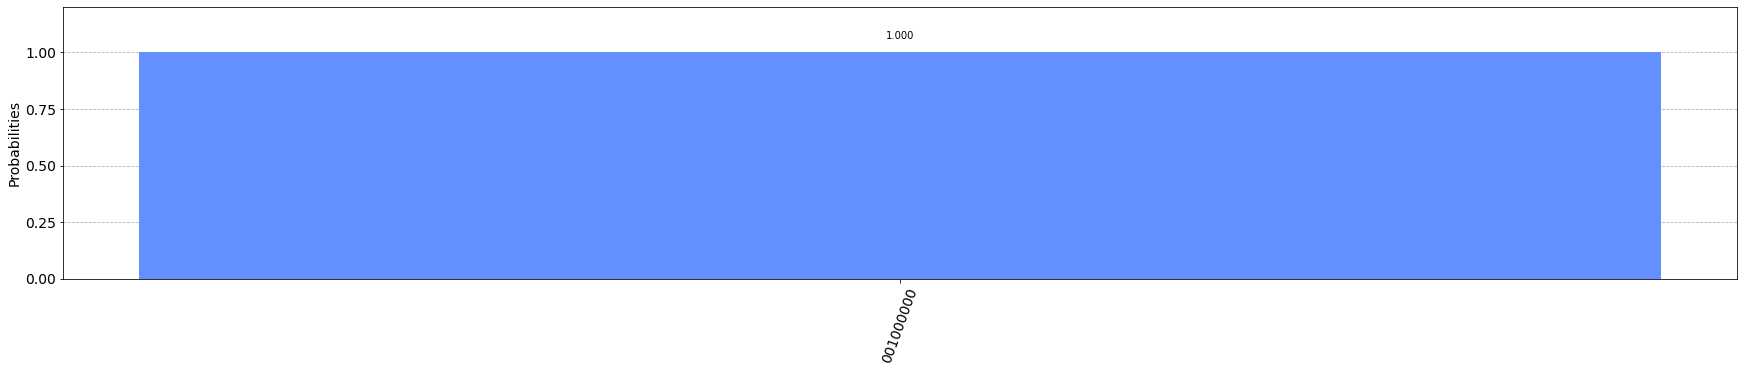

In [ ]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer, figsize=(30,5))


Lets convert that result to decimal

In [ ]:
def binary_to_decimal(binary):
    i,integer = 0,0
    size = len(binary)
    while i < len(binary):
        integer += int(binary[size - 1 - i])*pow(2,i)
        i+=1
    print(integer)

b = binary_to_decimal("001000000")

64


Now  $\theta = \frac{1}{2^{n}} \times b_{TheThingAbove}$, where b is the decimal value of the qubit with the highest probability, and n is the number of counting registers used to measure $|\psi\rangle$.

In for the example, we used the T-Gate, which had a phase of $\frac{\pi}{4}$. 
The binary value we received (001000000) is 64 in binary. The number of qubits we used in our coutnting register was 3, so $\theta = \frac{64}{2^{9}} = \frac{1}{8} $.

If we plug $\theta = \frac{1}{8}$ into $e^{2 \pi i\theta }$, then the phase that we obtain is  $e^\frac{\pi i}{4}$, which is what we expect.